In [1]:
# Imports
# !pip install torchinfo
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torchvision import datasets, transforms
from torchinfo import summary
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import random
import cv2
import Comparison_v2 as CM
import os
from DataSetting_v2 import DataPlanner as DP

In [2]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

### Comparison

In [3]:
notion = '240513Comp1'
save_path = f'../saved/{notion}/'
figs = []

In [4]:
datadir = f'../dataset/0509/make19_30/'
dataplanner = DP(datadir)
dataplanner.load_raw(scope=('T03', 'T04'), mmap_mode='r')
test_data = dataplanner.regroup({'T03', 'T04'})

Loading dataset...


  0%|          | 0/1213 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Regrouping...


  0%|          | 0/10 [00:00<?, ?it/s]

T03 tag len=36 
T04 tag len=57 
T03 depth len=36 
T04 depth len=57 
T03 csi len=36 
T04 csi len=57 
T03 center len=36 
T04 center len=57 
T03 pd len=36 
T04 pd len=57 
T03 cimg len=36 
T04 cimg len=57 
T03 bbx len=36 
T04 bbx len=57 
T03 time len=36 
T04 time len=57 
T03 ind len=36 
T04 ind len=57 
T03 rimg len=36 
T04 rimg len=57 


In [5]:
print(dataplanner.data.keys())

dict_keys([3, 4])


30Center loading...
30Center loaded Estimates of (5069, 128, 128) as float32
Reconstructing...Done
Reconstruction finished. Failure count = 0


<Figure size 432x288 with 0 Axes>

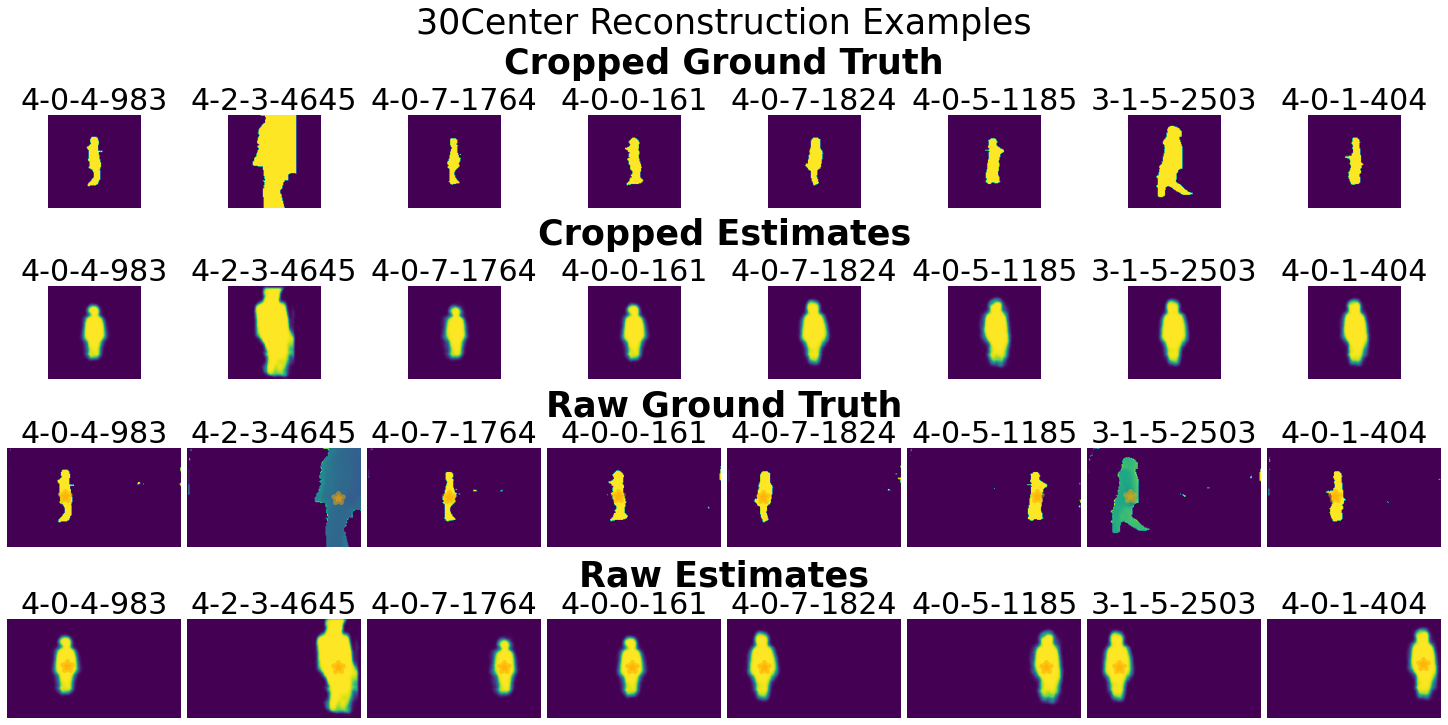

In [6]:
C30 = CM.CenterResultCalculator('30Center', '../saved/240512_30C/240512_30C_Student_pred.npy', test_data)
C30.resize()
figs.append(C30.plot_example())

In [ ]:
print(np.max(C30.resized[0]))

In [ ]:
F30_gt = np.squeeze(np.load('../dataset/0509/make14-split-few/rimg_test.npy', mmap_mode='r'))
F30_gt_ind = np.load('../dataset/0509/make14-split-few/ind_test.npy', mmap_mode='r')

F30 = Comparison.PropResultCalculator('30Few', '../saved/240331R1Prop/240331R1Prop_Student_pred.npy', F30_gt, F30_gt_ind)
F30.resize()
figs.append(F30.plot_example())

In [ ]:
N100_gt = np.squeeze(np.load('../dataset/0509/make16_100-split/r_img_test.npy', mmap_mode='r'))
N100_gt_ind = np.load('../dataset/0509/make16_100-split/ind_test.npy', mmap_mode='r')

N100 = Comparison.PropResultCalculator('100Normal', '../saved/240414R1/240414R1_Student_pred.npy', N100_gt, N100_gt_ind)
N100.resize()
figs.append(N100.plot_example())

In [ ]:
F100_gt = np.squeeze(np.load('../dataset/0509/make16_100-few/r_img_test.npy', mmap_mode='r'))
F100_gt_ind = np.load('../dataset/0509/make16_100-few/ind_test.npy', mmap_mode='r')

F100 = Comparison.PropResultCalculator('100Few', '../saved/240414R2/240414R2_Student_pred.npy', F100_gt, F100_gt_ind)
F100.resize()
figs.append(F100.plot_example())

In [ ]:
N300_gt = np.squeeze(np.load('../dataset/0509/make16_300-split/r_img_test.npy', mmap_mode='r'))
N300_gt_ind = np.load('../dataset/0509/make16_300-split/ind_test.npy', mmap_mode='r')

N300 = Comparison.PropResultCalculator('300Normal', '../saved/240415_300N/240415_300N_Student_pred.npy', N300_gt, N300_gt_ind)
N300.resize()
figs.append(N300.plot_example())

In [ ]:
F300_gt = np.squeeze(np.load('../dataset/0509/make16_300-few/r_img_test.npy', mmap_mode='r'))
F300_gt_ind = np.load('../dataset/0509/make16_300-few/ind_test.npy', mmap_mode='r')

F300 = Comparison.PropResultCalculator('300Few', '../saved/240415_300F/240415_300F_Student_pred.npy', F300_gt, F300_gt_ind)
F300.resize()
figs.append(F300.plot_example())

In [ ]:
N900_gt = np.squeeze(np.load('../dataset/0509/make16_900-split/r_img_test.npy', mmap_mode='r'))
N900_gt_ind = np.load('../dataset/0509/make16_900-split/ind_test.npy', mmap_mode='r')

N900 = Comparison.PropResultCalculator('900Normal', '../saved/240415_900N/240415_900N_Student_pred.npy', N900_gt, N900_gt_ind)
N900.resize()
figs.append(N900.plot_example())

In [ ]:
F900_gt = np.squeeze(np.load('../dataset/0509/make16_900-few/r_img_test.npy', mmap_mode='r'))
F900_gt_ind = np.load('../dataset/0509/make16_900-few/ind_test.npy', mmap_mode='r')

F900 = Comparison.PropResultCalculator('900Few', '../saved/240415_900F/240415_900F_Student_pred.npy', F900_gt, F900_gt_ind)
F900.resize()
figs.append(F900.plot_example())

In [ ]:
Z30 = Comparison.ZeroEstimates('Z30Nromal', None, N30_gt, N30_gt_ind)

In [ ]:
for method in(N30, Z30, F30, N100, F100, N300, F300, N900, F900):
    method.calculate_loss()
    fig, filename = method.calculate_cdf()

In [ ]:
figs.append(Comparison.gather_plot(N30, Z30, F30, N100, F100, N300, F300, N900, F900))

In [ ]:
import os
if not os.path.exists(save_path):
    os.makedirs(save_path)
for fig, filename in figs:
    fig.savefig(f"{save_path}{notion}_{filename}")